In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm, preprocessing 

import cufflinks as cf
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os

In [4]:
data = pd.read_csv(r"D:\8th Semester B.Tech (IT)\4. Major Project\Diamond.csv")

In [5]:
data

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
data.head()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53940 non-null  float64
 1   cut             53940 non-null  int64  
 2   color           53940 non-null  int64  
 3   clarity         53940 non-null  int64  
 4   height (in mm)  53940 non-null  float64
 5   table           53940 non-null  float64
 6   price (in USD)  53940 non-null  int64  
 7   length (in mm)  53940 non-null  float64
 8   width (in mm)   53940 non-null  float64
 9   depth (in mm)   53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [8]:
data.isnull().sum()

carat             0
cut               0
color             0
clarity           0
height (in mm)    0
table             0
price (in USD)    0
length (in mm)    0
width (in mm)     0
depth (in mm)     0
dtype: int64

In [9]:
data.dtypes

carat             float64
cut                 int64
color               int64
clarity             int64
height (in mm)    float64
table             float64
price (in USD)      int64
length (in mm)    float64
width (in mm)     float64
depth (in mm)     float64
dtype: object

In [10]:
data.describe()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
zero_data = data[(data['length (in mm)'] == 0) | (data['width (in mm)'] == 0) | (data['depth (in mm)'] == 0)]

In [12]:
zero_data.head()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
2207,1.00,4,4,2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,4,3,1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,4,4,2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,4,5,2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,2,4,1,64.0,61.0,4731,7.15,7.04,0.0


In [13]:
zero_data.shape

(20, 10)

In [14]:
data.drop(zero_data.index, inplace = True)

In [15]:
data.shape

(53920, 10)

In [16]:
X = data.drop(['price (in USD)'], axis=1)
y = data['price (in USD)']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
print("Total dataset size: {}".format(data.shape))
print("Training set size (80%): {}".format(X_train.shape))
print("Test set size (20%): {}".format(X_test.shape))

Total dataset size: (53920, 10)
Training set size (80%): (43136, 9)
Test set size (20%): (10784, 9)


In [19]:
res=[]

In [20]:
for k in range(1,201):   
    clf=KNeighborsRegressor(n_neighbors=k,weights='distance',p=1)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_train)
    res.insert(k,metrics.r2_score(y_train, y_pred))

In [21]:
display(res)

[0.9999910112690984,
 0.9999948490595171,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666074876,
 0.9999952666

In [22]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999952666074876
Adjusted R^2: 0.9999952656196721
MAE: 0.4309470820969337
MSE: 75.22168644906034
RMSE: 8.67304366696377


In [23]:
n_neighbors=[i+1 for i in range(200)]

In [24]:
print(n_neighbors)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


In [25]:
df1=pd.DataFrame({'n_neighbors':n_neighbors,'Accuracy':res})

In [26]:
df1

,n_neighbors,Accuracy
0,1,0.999991
1,2,0.999995
2,3,0.999995
3,4,0.999995
4,5,0.999995
...,...,...
195,196,0.999995
196,197,0.999995
197,198,0.999995
198,199,0.999995


Text(0.5, 1.0, 'n_neighbors vs Accuracy')

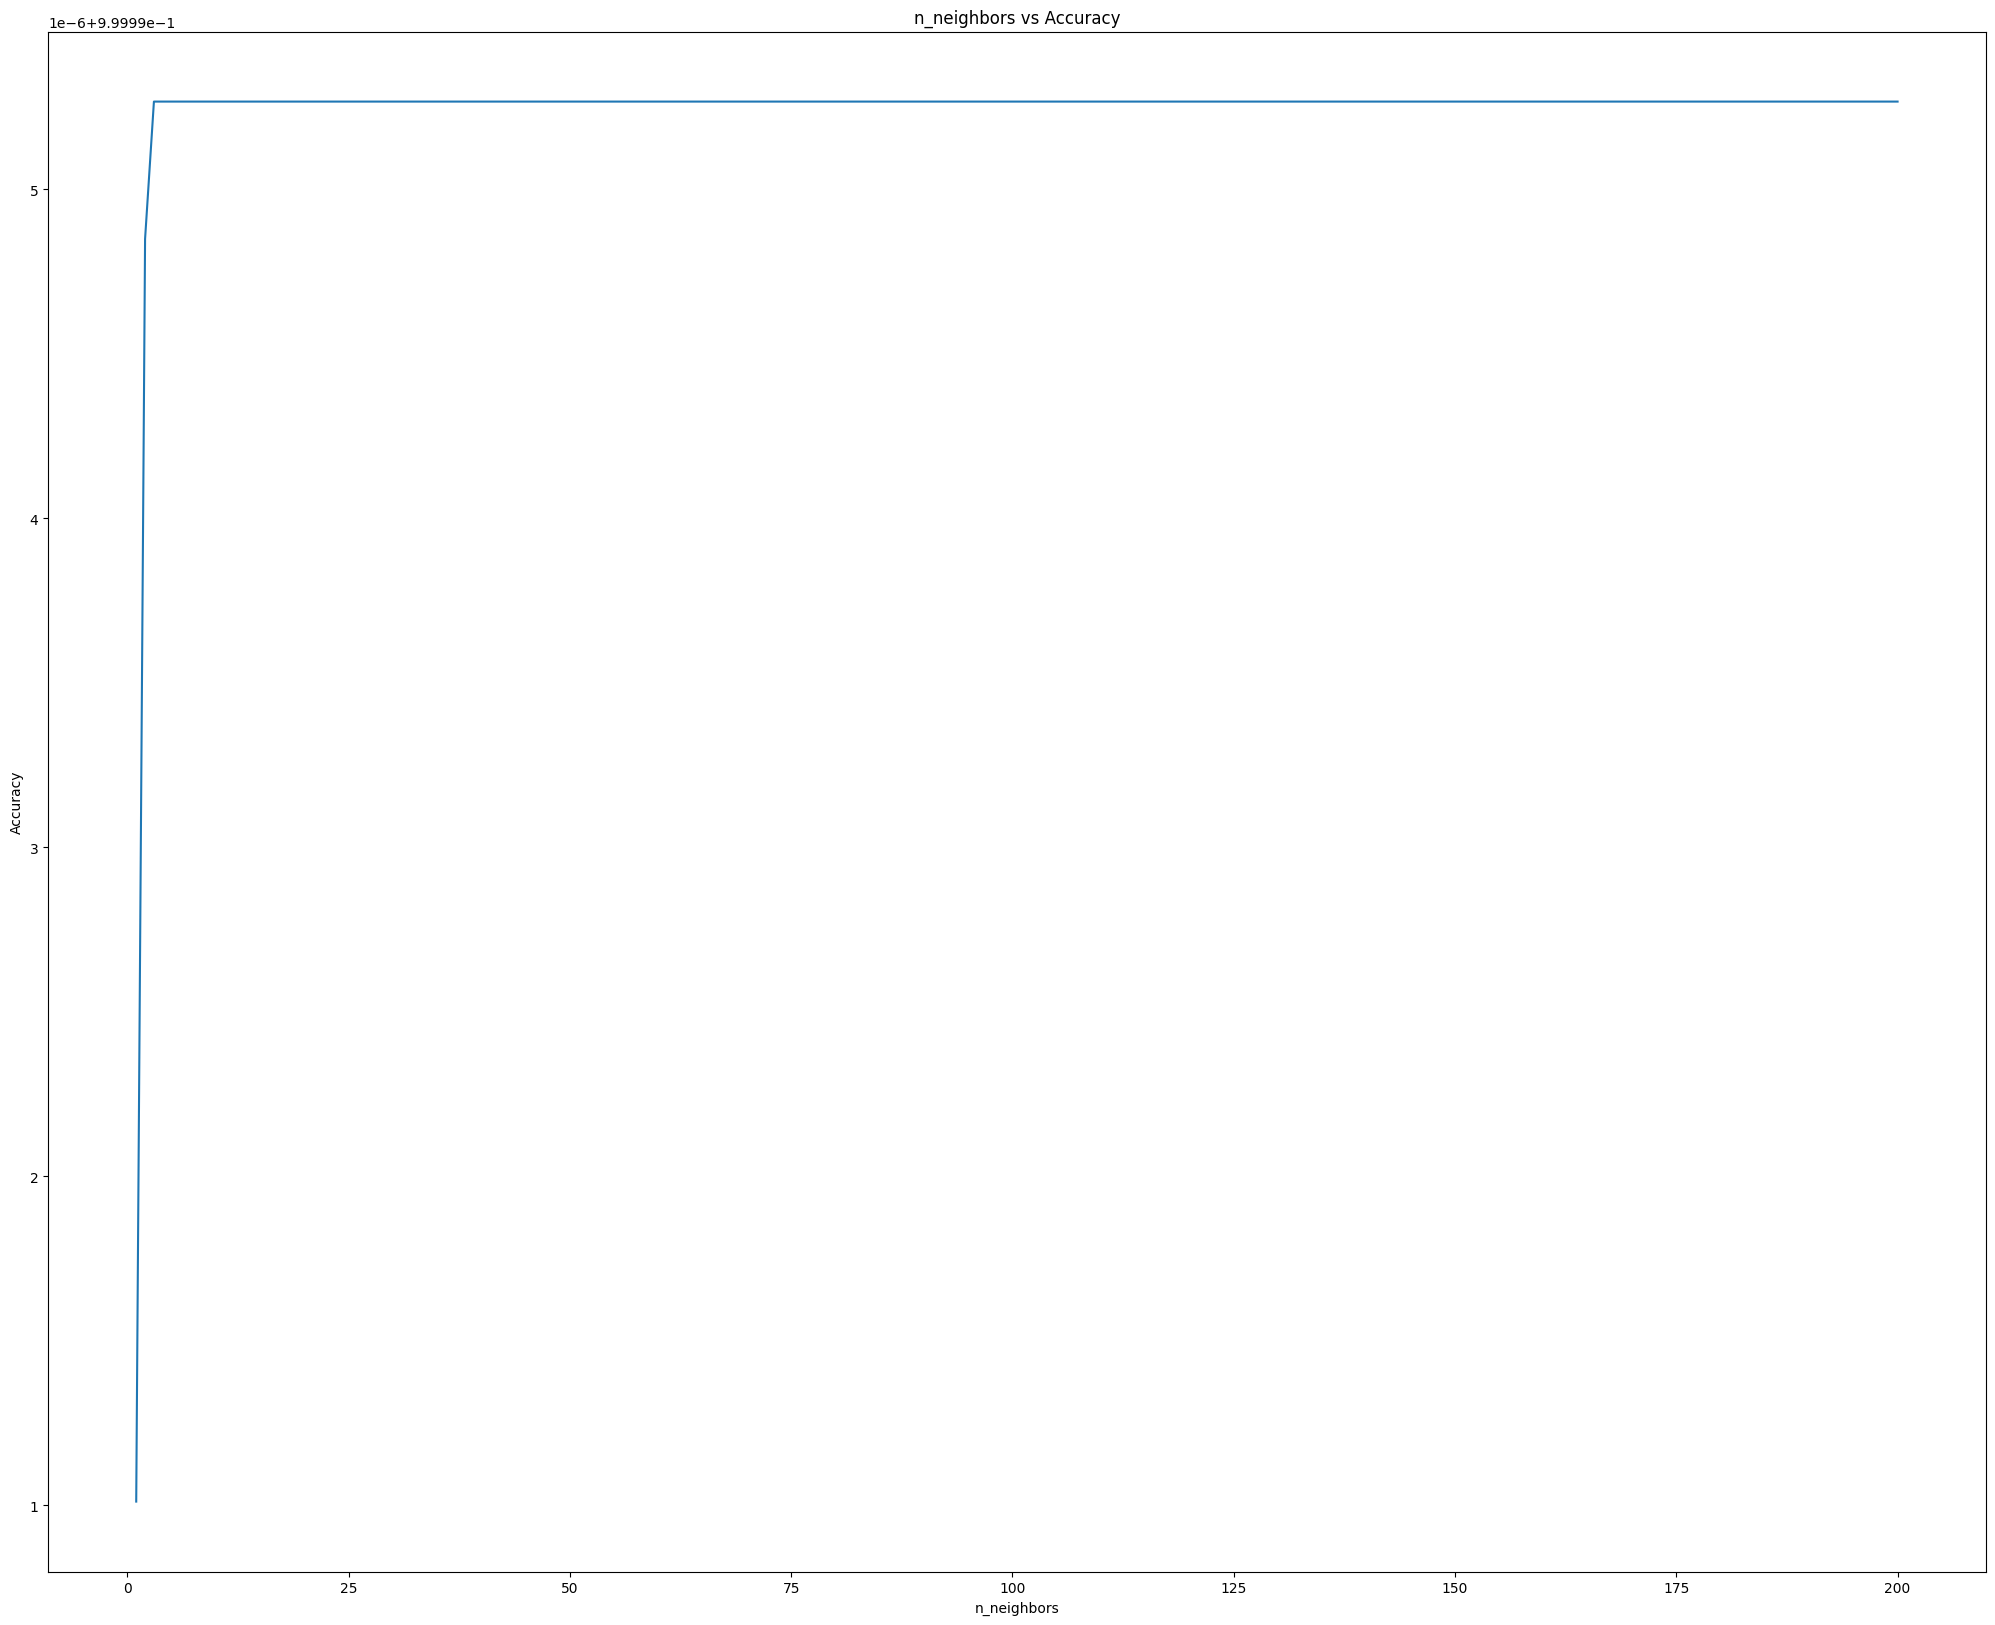

In [28]:
f = plt.figure(figsize=(20,25))
f.set_figwidth(25)
f.set_figheight(20)
plt.plot(n_neighbors,res)
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.title("n_neighbors vs Accuracy")

In [29]:
file1="kval_acc.xlsx"

In [30]:
df1.to_excel(file1)

In [31]:
k_max=res.index(max(res))+1
print("At K={}, Max Accuracy={}".format(k_max,max(res)*100))

At K=3, Max Accuracy=99.99952666074876


In [32]:
clf1=KNeighborsRegressor(n_neighbors=k_max,weights='distance',p=1)
clf1.fit(X_train,y_train)
y_test_pred=clf1.predict(X_test)

In [33]:
print('R^2:',metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9683118493918951
Adjusted R^2: 0.9682853788744018
MAE: 368.3804556593714
MSE: 504546.12535081577
RMSE: 710.3141033027683


In [34]:
df=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':y_test_pred})

In [35]:
df

,Actual Price,Predicted Price
22990,11040,13368.317460
22370,628,592.663594
28254,666,704.350324
42947,506,500.380282
30688,737,711.194978
...,...,...
17271,6915,9074.419334
35274,895,918.135802
7764,4283,4434.905784
26744,16538,11709.637583


In [36]:
file="result_knn.xlsx"

In [37]:
df.to_excel(file)

In [38]:
I=[]
for i in range (1,10785):
    I.insert(i,i)

In [39]:
display(I)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [40]:
I1=y_test.tolist()

In [41]:
I2=y_test_pred.tolist()

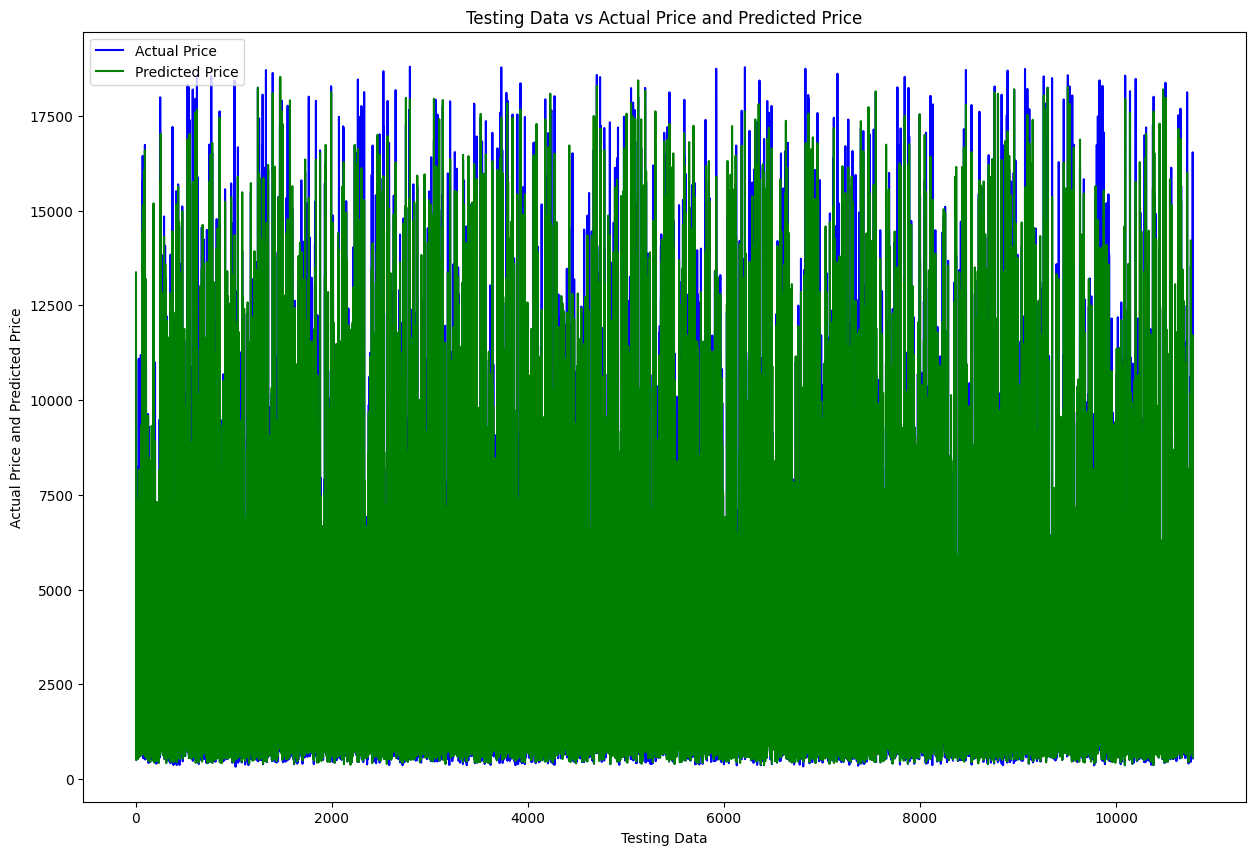

In [42]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I, I1, 'b', label='Actual Price')
plt.plot(I, I2, 'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [43]:
I3=I[0:1000]

In [44]:
I4=I1[0:1000]

In [45]:
I5=I2[0:1000]

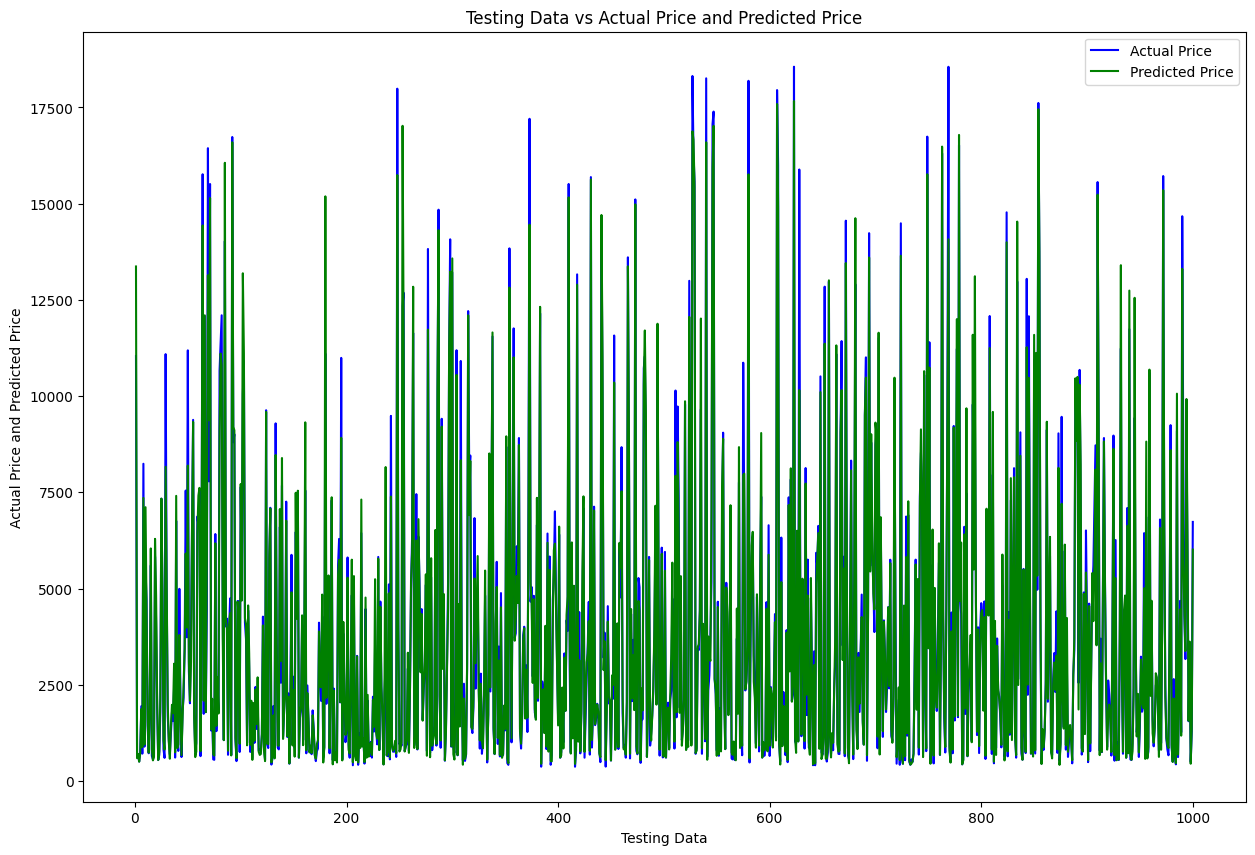

In [46]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I3, I4, 'b', label='Actual Price')
plt.plot(I3, I5, 'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [47]:
I6=I[0:100]

In [48]:
I7=I1[0:100]

In [49]:
I8=I2[0:100]

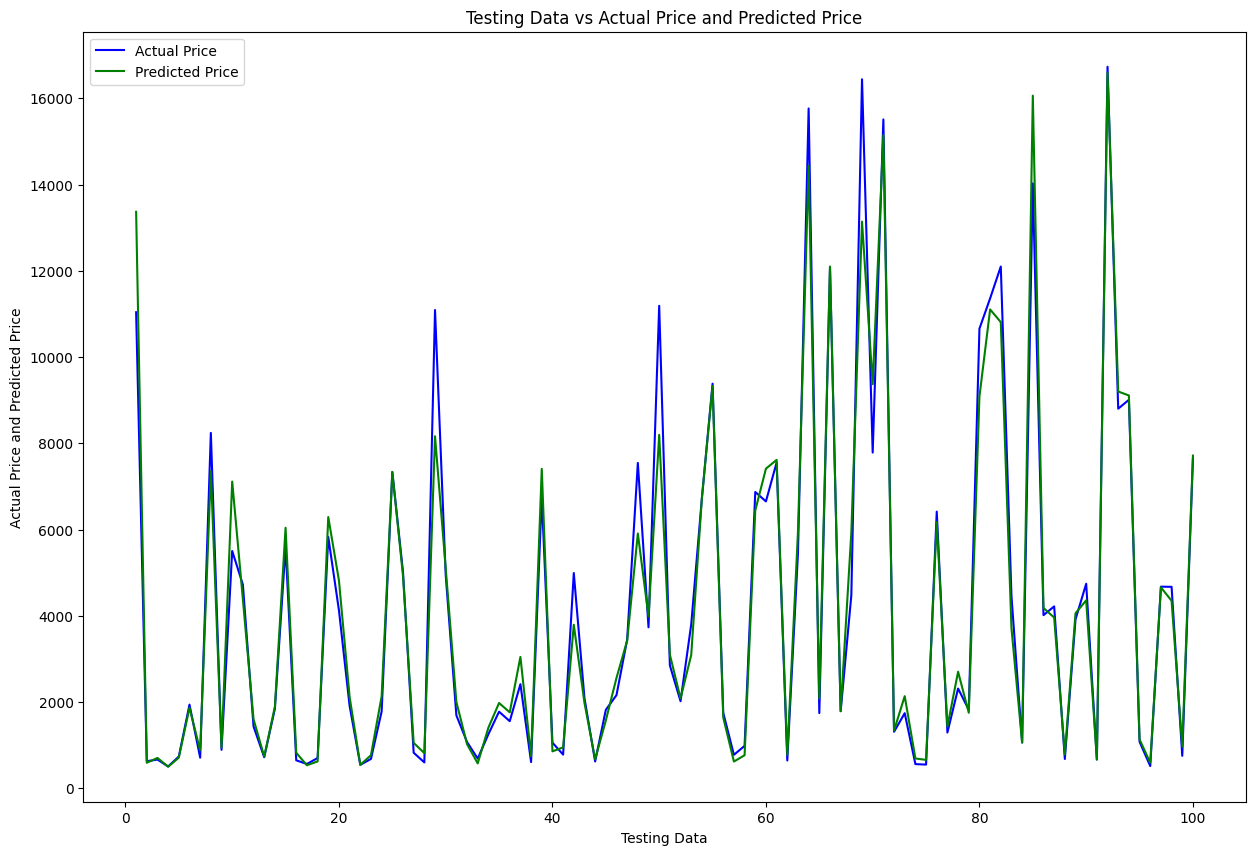

In [50]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I6, I7,'b', label='Actual Price')
plt.plot(I6, I8,'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [51]:
df['Difference'] = None

In [52]:
df['Percentage of Difference'] = None

In [53]:
df

,Actual Price,Predicted Price,Difference,Percentage of Difference
22990,11040,13368.317460,None,None
22370,628,592.663594,None,None
28254,666,704.350324,None,None
42947,506,500.380282,None,None
30688,737,711.194978,None,None
...,...,...,...,...
17271,6915,9074.419334,None,None
35274,895,918.135802,None,None
7764,4283,4434.905784,None,None
26744,16538,11709.637583,None,None


In [54]:
index_actual=df.columns.get_loc('Actual Price')
index_predicted=df.columns.get_loc('Predicted Price')
index_difference=df.columns.get_loc('Difference')
index_percentage=df.columns.get_loc('Percentage of Difference')
 
print(index_actual,index_predicted,index_difference,index_percentage)

0 1 2 3


In [55]:
for row in range(0, len(df)):
    df.iat[row, index_difference] = abs(df.iat[row, index_actual] - df.iat[row, index_predicted])
    df.iat[row, index_percentage] = df.iat[row, index_difference]/df.iat[row, index_actual]*100
    
df

,Actual Price,Predicted Price,Difference,Percentage of Difference
22990,11040,13368.317460,2328.31746,21.089832
22370,628,592.663594,35.336406,5.626816
28254,666,704.350324,38.350324,5.758307
42947,506,500.380282,5.619718,1.110616
30688,737,711.194978,25.805022,3.50136
...,...,...,...,...
17271,6915,9074.419334,2159.419334,31.228045
35274,895,918.135802,23.135802,2.585006
7764,4283,4434.905784,151.905784,3.546715
26744,16538,11709.637583,4828.362417,29.195564


In [56]:
file="result_knn.xlsx"

In [57]:
df.to_excel(file)